### Libraries

In [1]:
import numpy


from matplotlib import pyplot
%matplotlib inline
from matplotlib import rcParams

In [2]:
from matplotlib import animation
from JSAnimation.IPython_display import display_animation

### Parameters

In [3]:
nx = 81
nt = 70
dx = 4.0/(nx-1)

x = numpy.linspace(0,4,nx)

In [4]:
u = numpy.empty([nx],dtype=float)

In [5]:
numpy.shape(u)

(81,)

In [6]:
for i in range(nx):
    if (x[i] >= 0) and (x[i]<2):
        u[i] = 1.
    else:
        u[i] = 0.
    

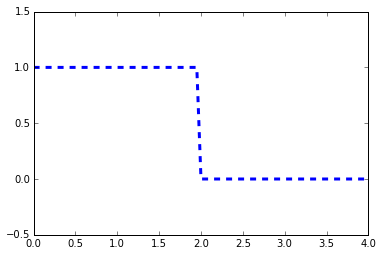

In [7]:
pyplot.plot(x, u, color='b', ls='--', lw=3)
pyplot.ylim(-0.5,1.5);

### Task 1

In [8]:
# or can define a function:

def u_initial(nx):
    for i in range(nx):
        if (x[i] >= 0) and (x[i]<2):
            u[i] = 1.
        else:
            u[i] = 0.
    
    return u

In [9]:
numpy.shape(u)

(81,)

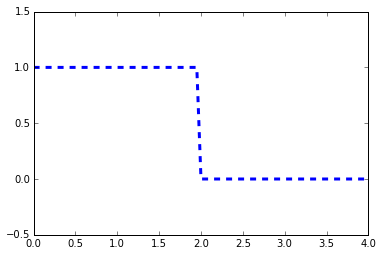

In [10]:
pyplot.plot(x, u, color='b', ls='--', lw=3)
pyplot.ylim(-0.5,1.5);

### Task 2

In [11]:
computeF = lambda u: (u/2)**2

In [12]:
type(computeF)

function

In [13]:
print(computeF(u))

[ 0.25  0.25  0.25  0.25  0.25  0.25  0.25  0.25  0.25  0.25  0.25  0.25
  0.25  0.25  0.25  0.25  0.25  0.25  0.25  0.25  0.25  0.25  0.25  0.25
  0.25  0.25  0.25  0.25  0.25  0.25  0.25  0.25  0.25  0.25  0.25  0.25
  0.25  0.25  0.25  0.25  0.    0.    0.    0.    0.    0.    0.    0.    0.
  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
  0.    0.    0.    0.    0.    0.  ]


### Task 3

### McCormack Scheme

Complete the maccormack function below using array operations

In [14]:
len(u[:-1])


80

In [15]:
len(u)

81

In [16]:
def maccormack(u, nt, dt, dx):
    
    un = numpy.zeros((nt,len(u)))
    ustar = numpy.empty_like(u)
    un[:,:] = u.copy()
    ustar = u.copy()
    
    for t in range(1,nt):
        F = computeF(u)
        ustar[:-1] = u[:-1] - dt/dx * (F[1:]-F[:-1])
        Fstar = computeF(ustar)
        un[t,1:] = 0.5 * (u[1:] + ustar[1:] - dt/dx * (Fstar[1:] - Fstar[:-1]))
        u = un[t].copy()
        
    return un

In [17]:
def animate(data):
    x = numpy.linspace(0,4,nx)
    y = data
    line.set_data(x,y)
    return line,


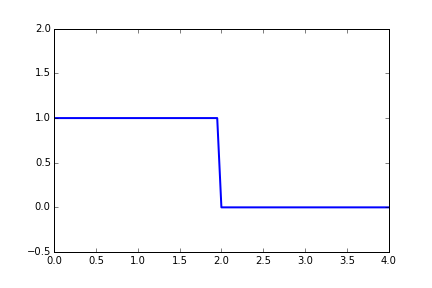
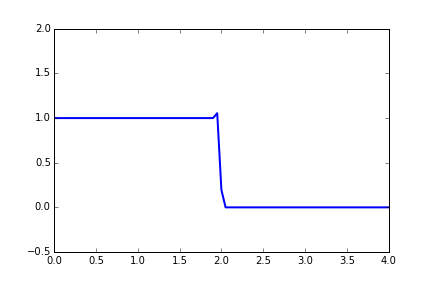
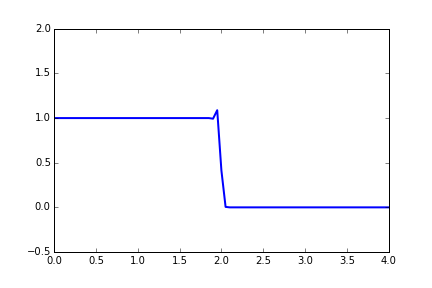
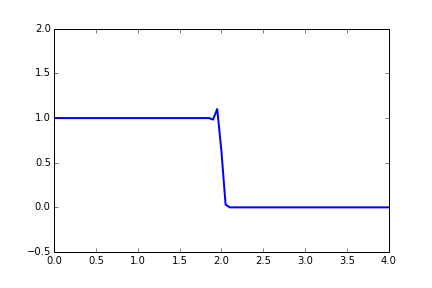
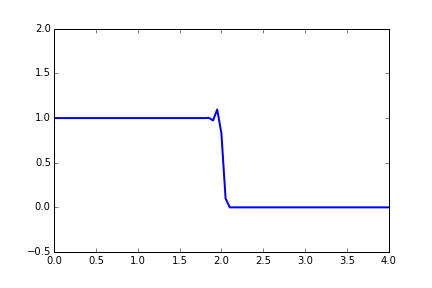
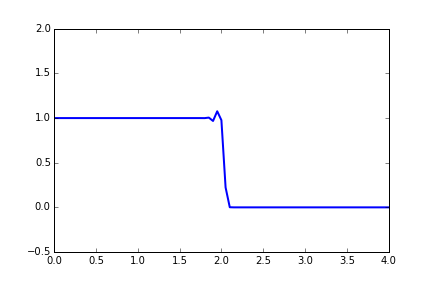
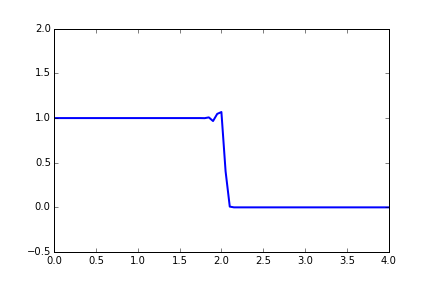
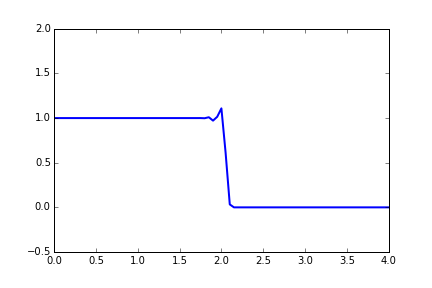
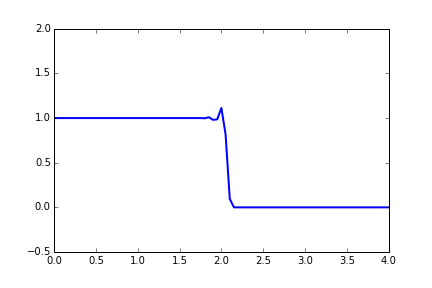
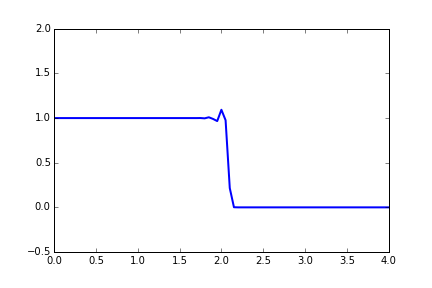
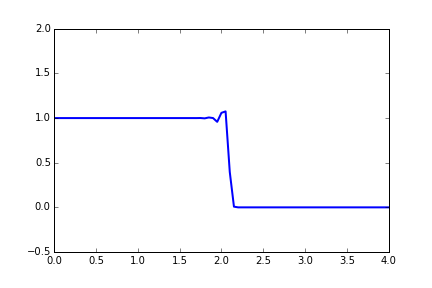
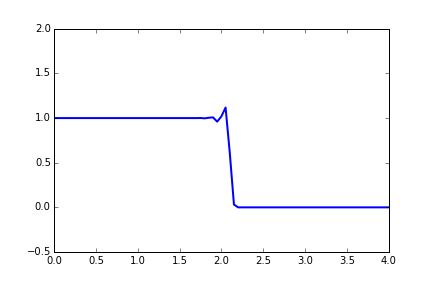
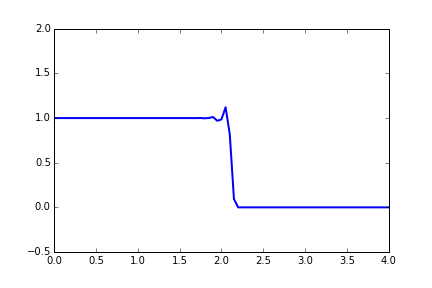
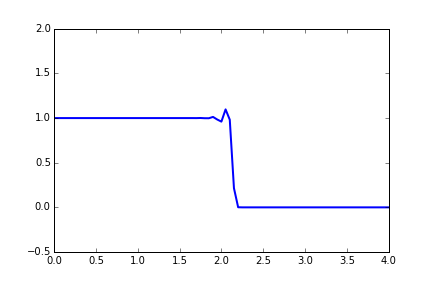
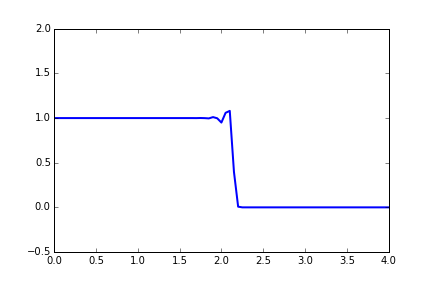
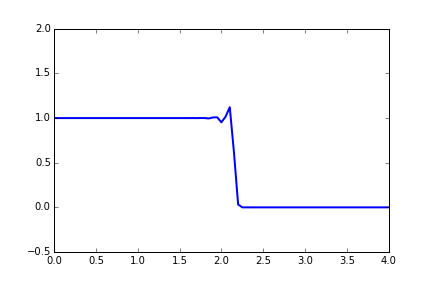
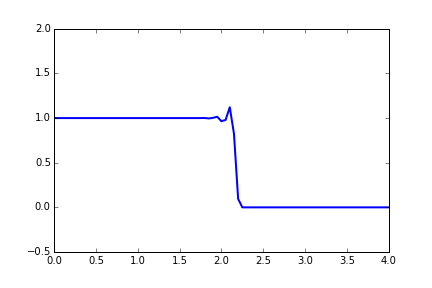
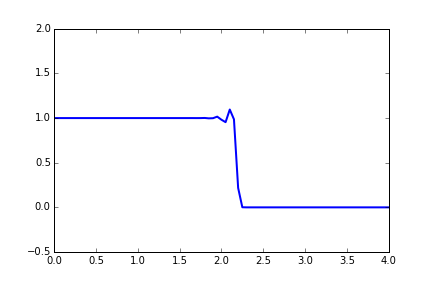
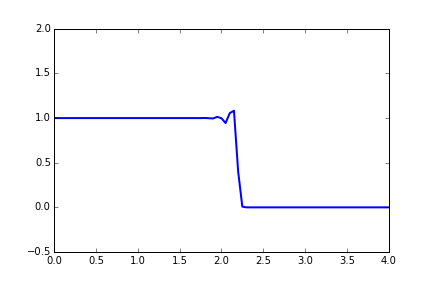
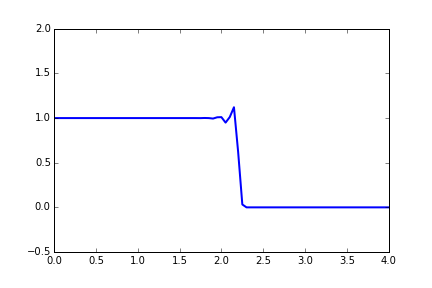
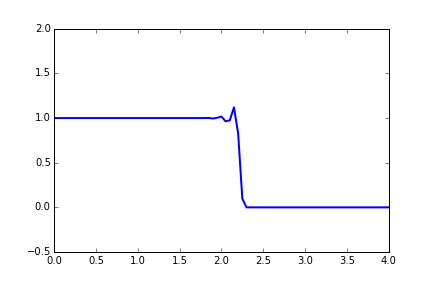
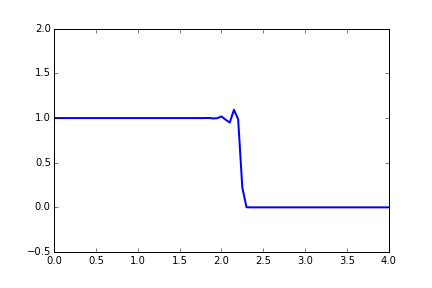
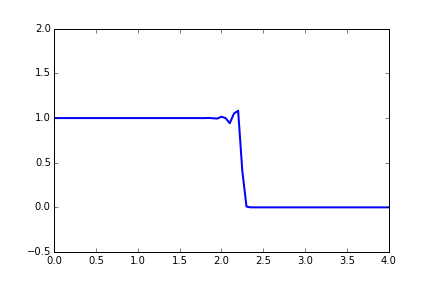
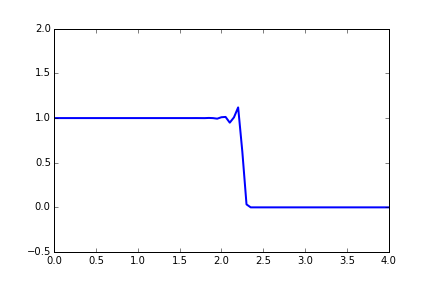
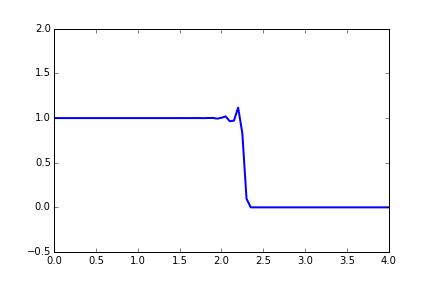
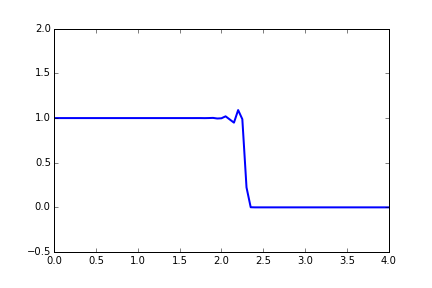
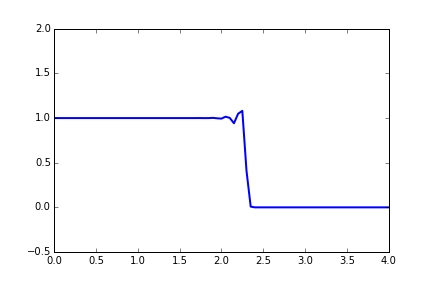
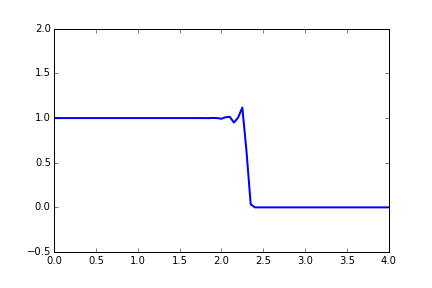
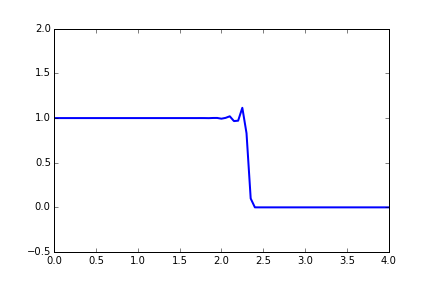
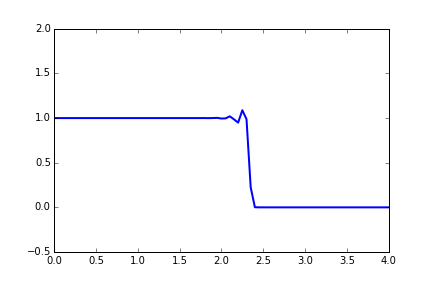
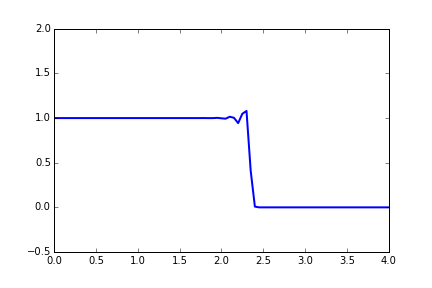
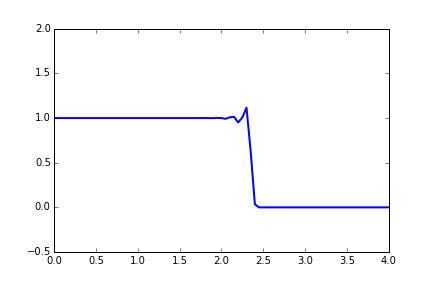
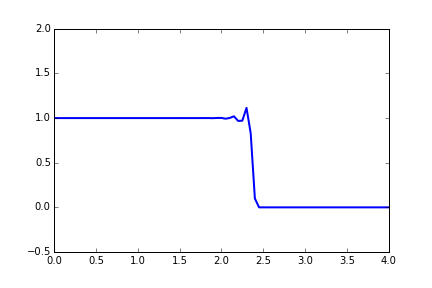
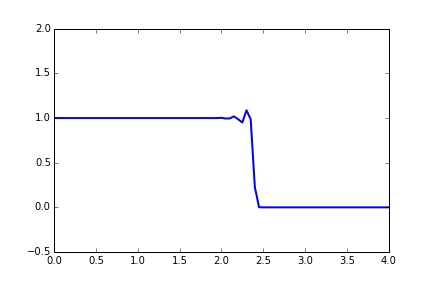
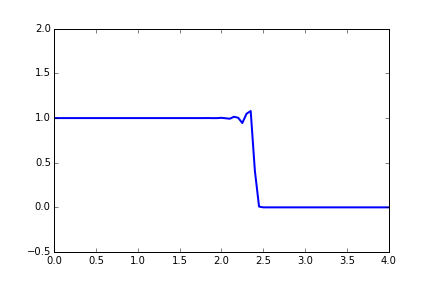
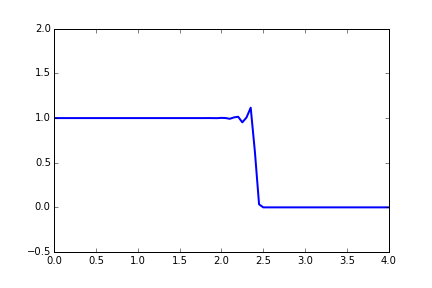
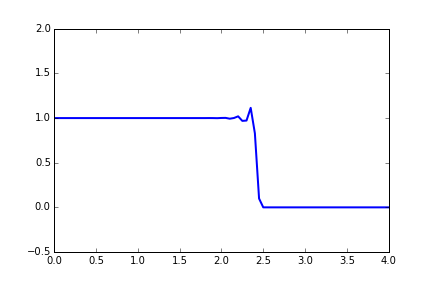
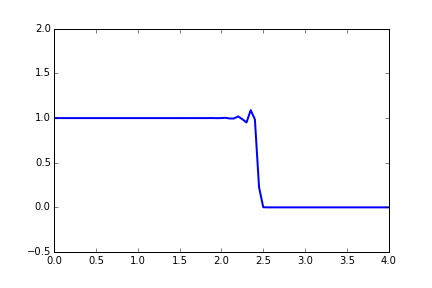
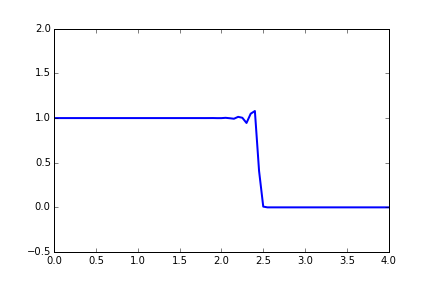
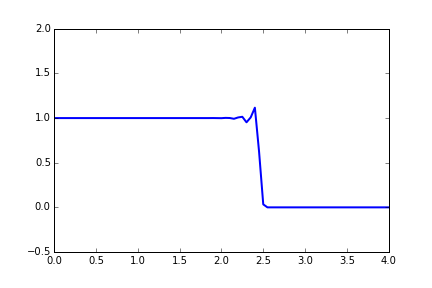
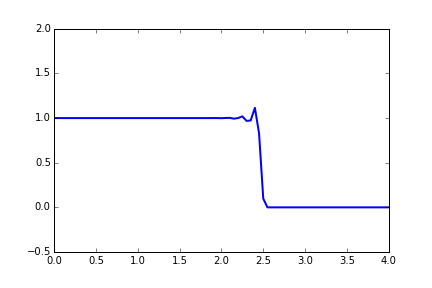
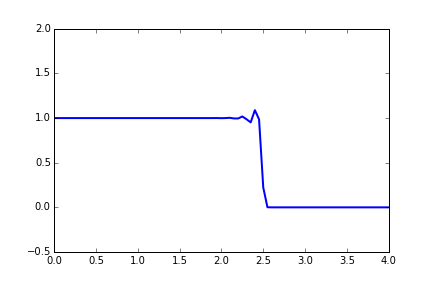
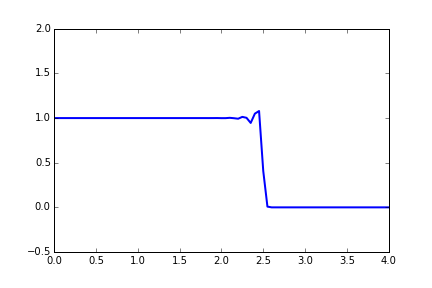
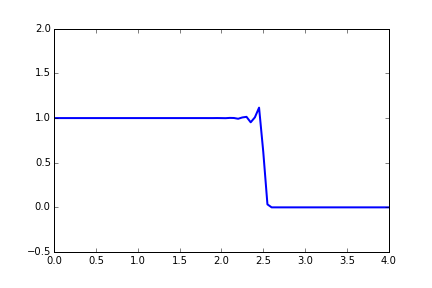
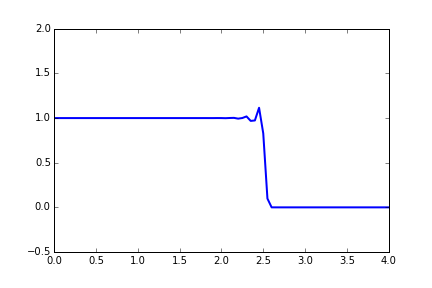
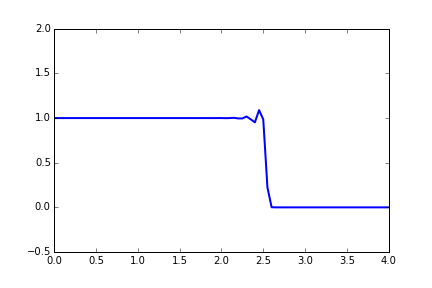
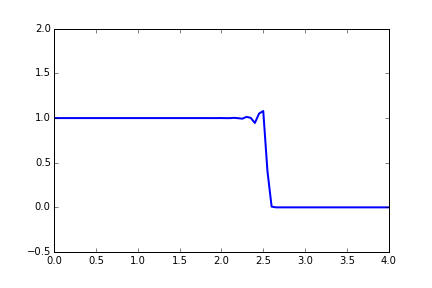
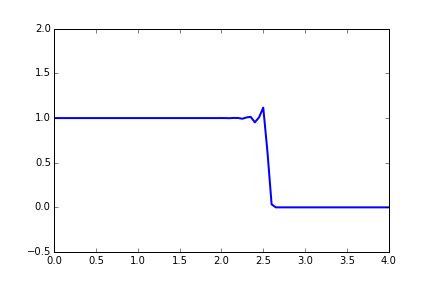
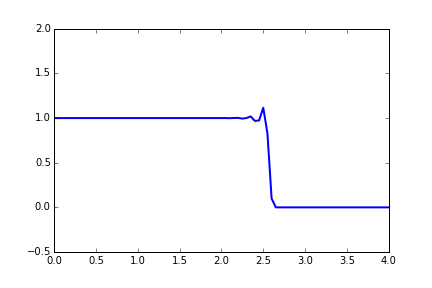
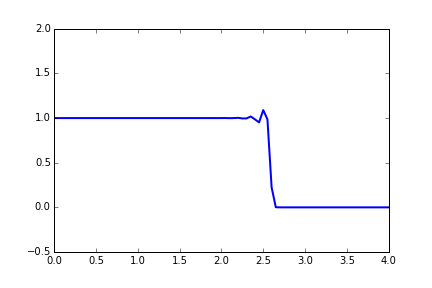
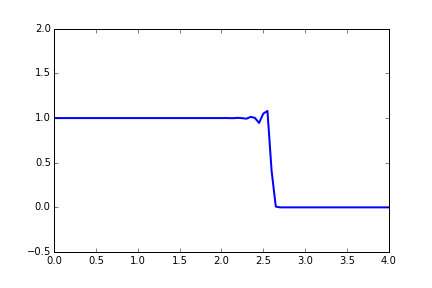
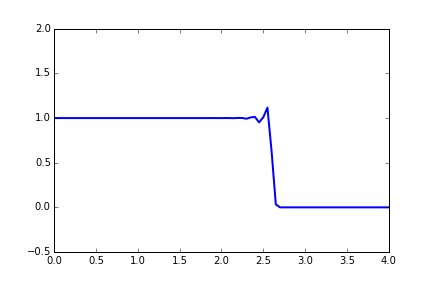
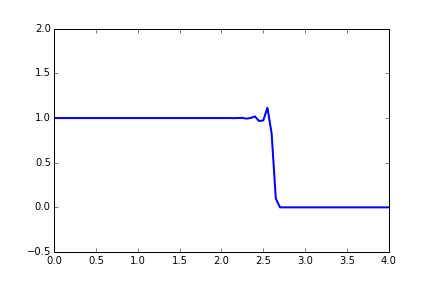
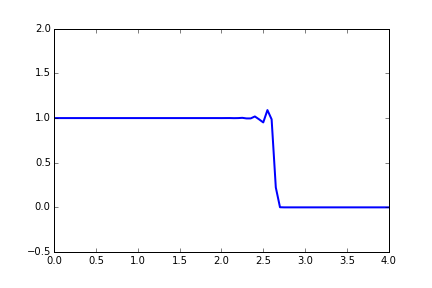
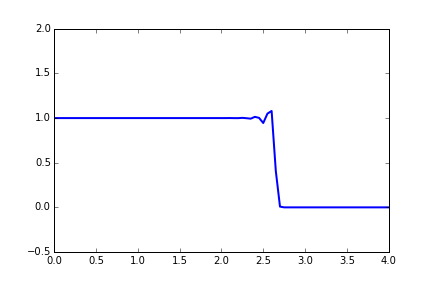
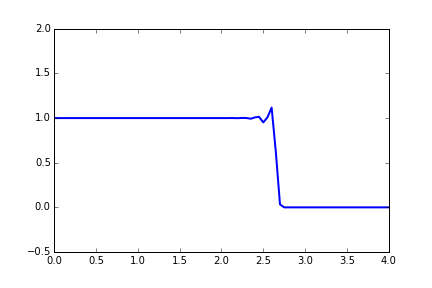
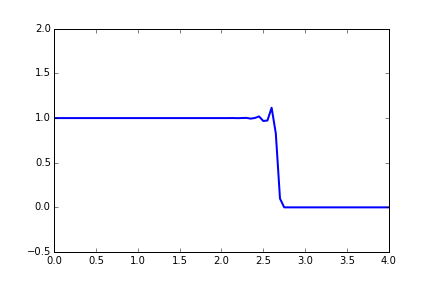
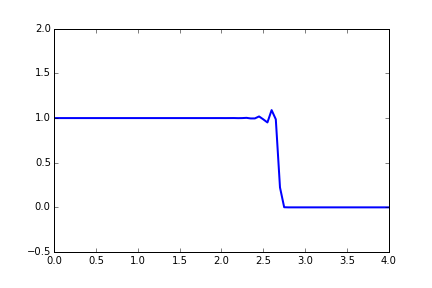
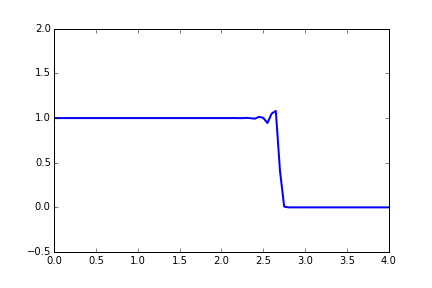
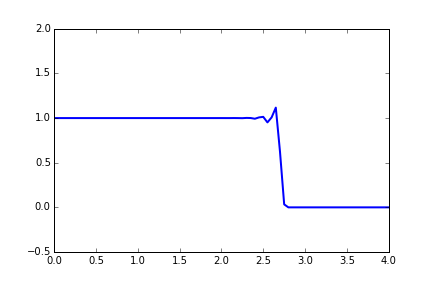
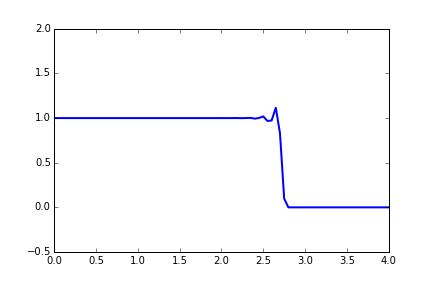
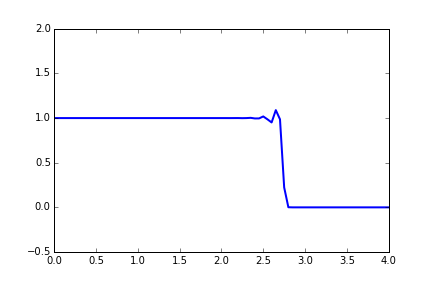
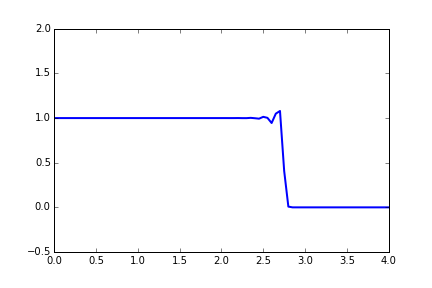
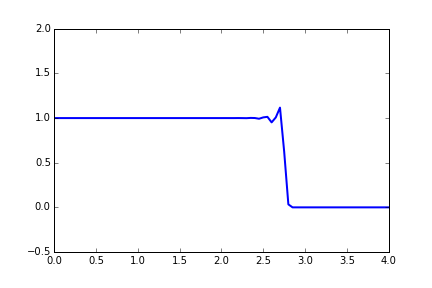
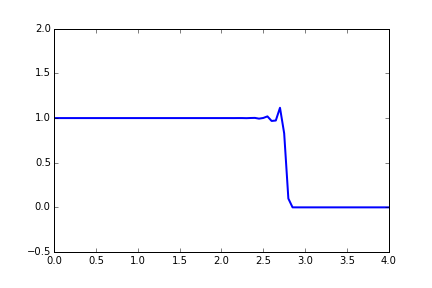
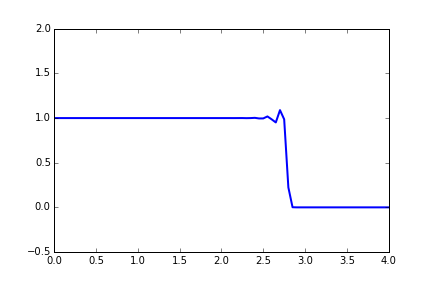
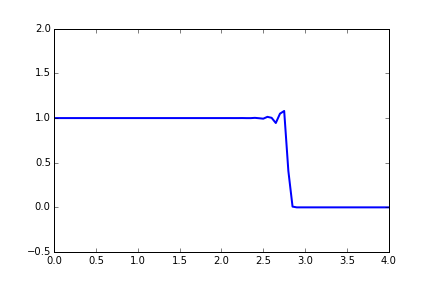
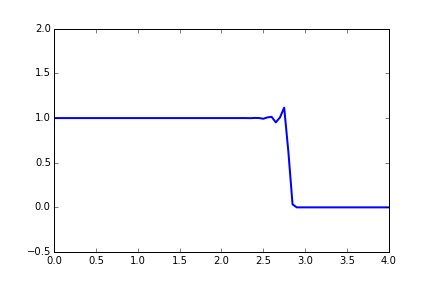
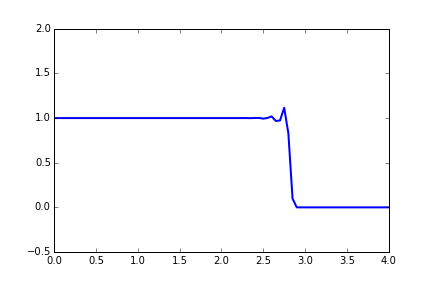
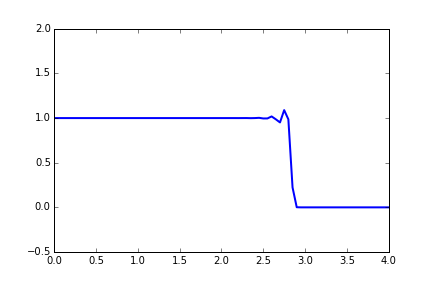

In [18]:
u = u_initial(nx)
sigma = 1
dt = sigma*dx

un = maccormack(u,nt,dt,dx)

fig = pyplot.figure();
ax = pyplot.axes(xlim=(0,4),ylim=(-.5,2));
line, = ax.plot([],[],lw=2);

anim = animation.FuncAnimation(fig, animate, frames=un, interval=50)
display_animation(anim, default_mode='once')

### Task 4 - Numerical Damping

In [19]:
len(u[1:-1])

79

In [20]:
FF = computeF(u)

In [21]:
len(FF[2:])

79

In [22]:
len(FF[1:-1])

79

In [23]:
un = numpy.zeros((nt,len(u)))

In [24]:
numpy.shape(u[1:-1])

(79,)

In [25]:
numpy.shape(u[2:])

(79,)

In [31]:
numpy.shape(un[1:])

(69, 81)

In [26]:
def maccormack_damp(u, nt, dt, dx, epsilon):
    un = numpy.zeros((nt,len(u)))
    ustar = numpy.empty_like(u)
    un[:,:] = u.copy()
    ustar = u.copy()
    
    for t in range(1,nt):
        F = computeF(u)
        ustar[1:-1] = u[1:-1] - dt/dx *(F[2:] - F[1:-1])+ epsilon*(u[2:] - 2*u[1:-1] + u[:-2])
        #ustar[:-1] = (u[:-1] - dt/dx *(F[1:]-F[:-1])) + #epsilon*(u[i+1] - 2*u[i] + u[i-1])
        Fstar = computeF(ustar)
        un[t,1:] = 0.5 * (u[1:] + ustar[1:] - dt/dx * (Fstar[1:] - Fstar[:-1]))
        #un[t,1:-1] = 0.5 * (u[1:-1] + ustar[1:-1] - dt/dx * (Fstar[2:] - F[1:-1]) )
        u = un[t].copy()
        
    return un


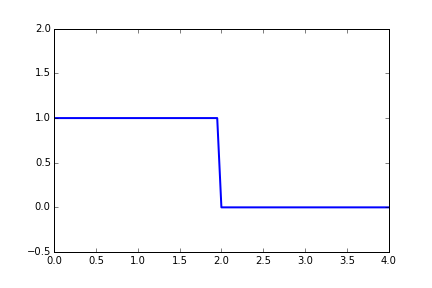
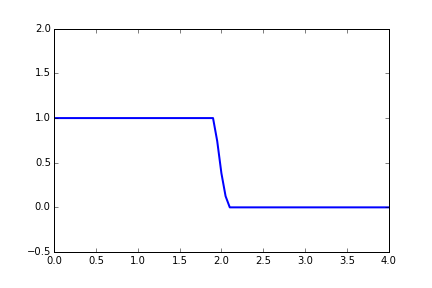
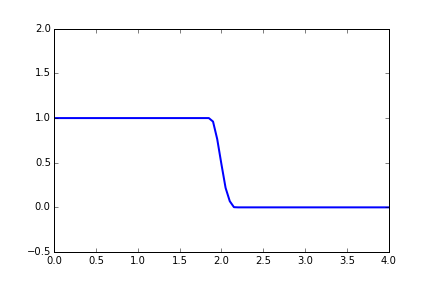
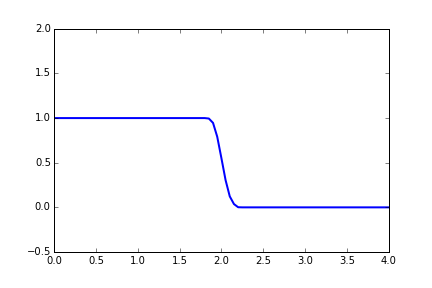
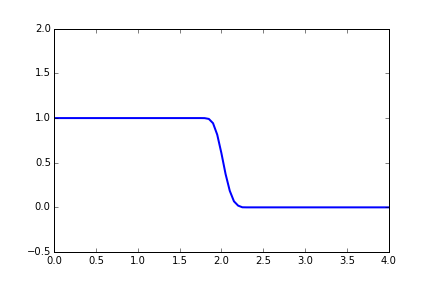
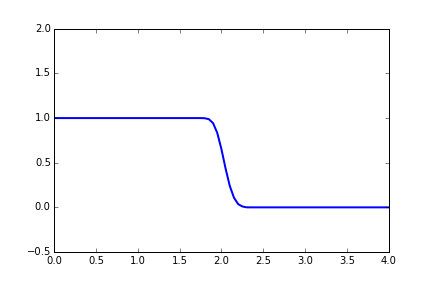
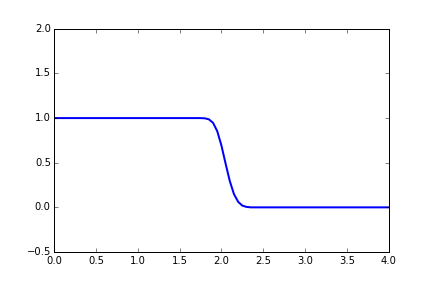
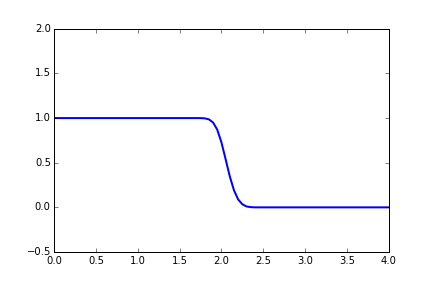
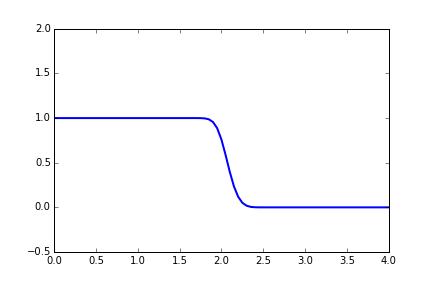
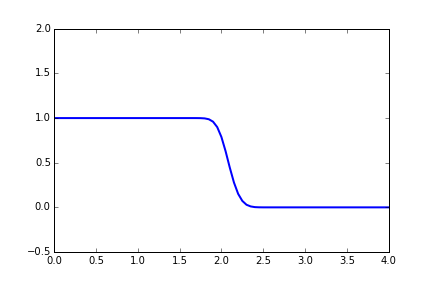
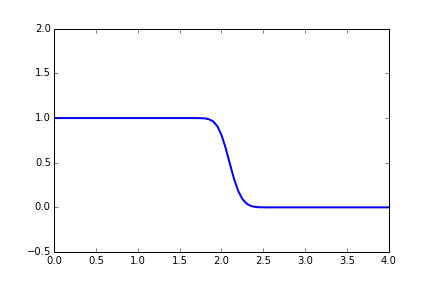
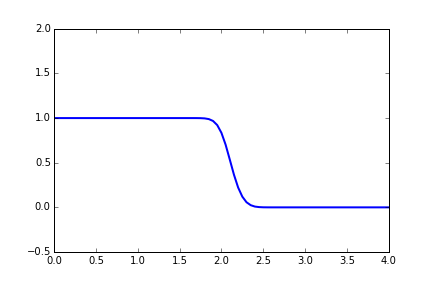
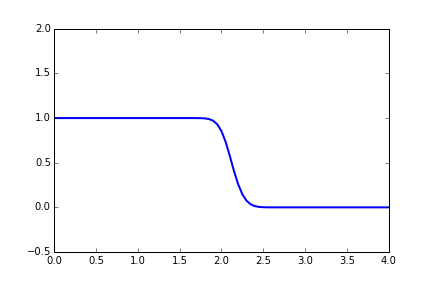
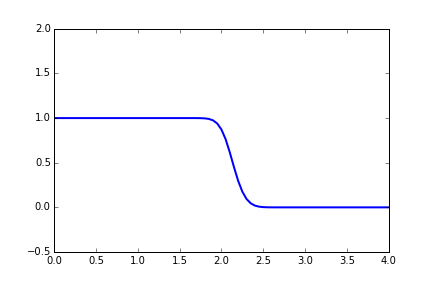
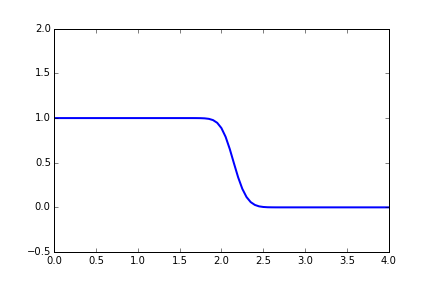
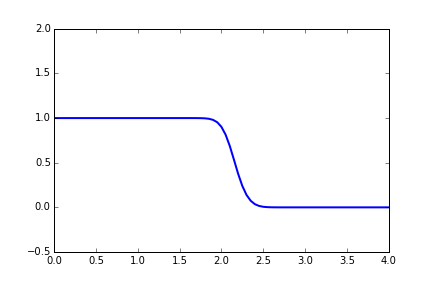
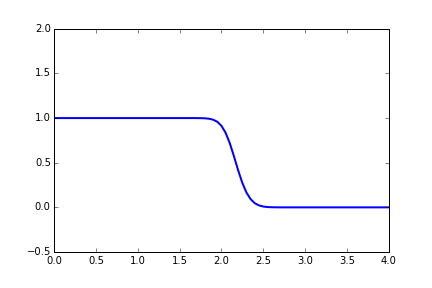
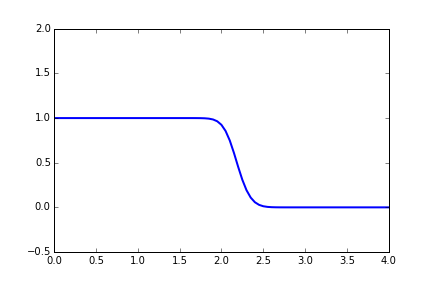
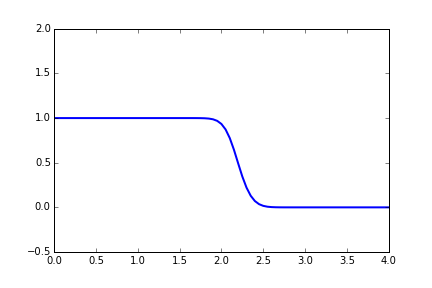
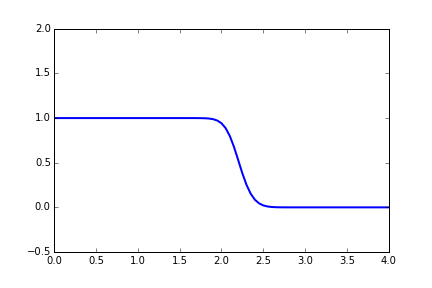
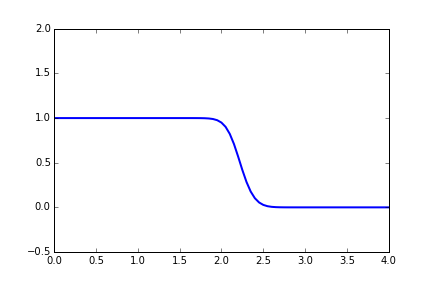
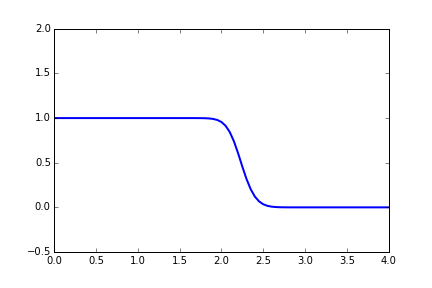
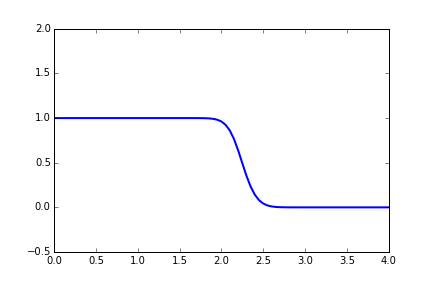
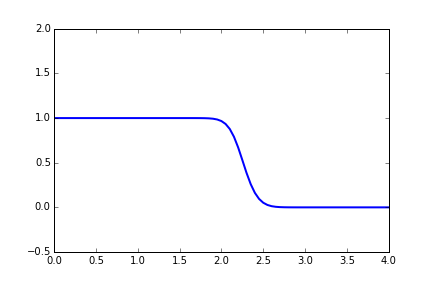
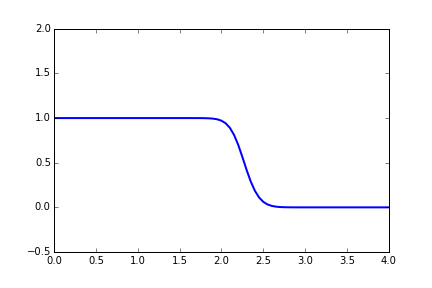
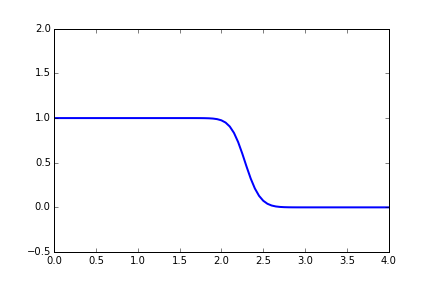
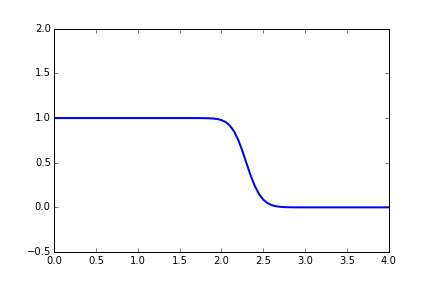
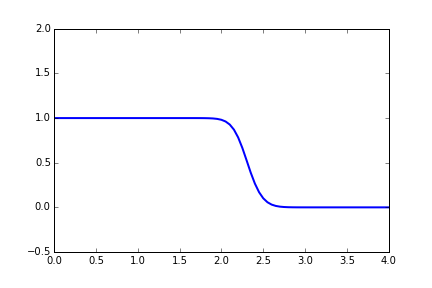
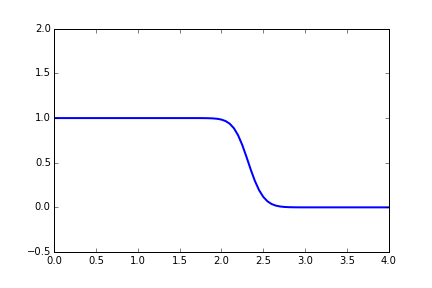
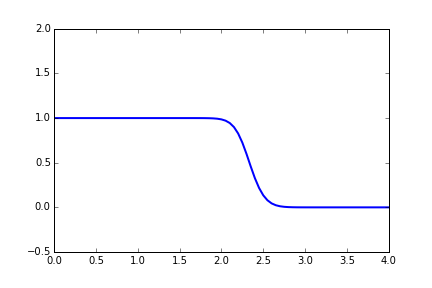
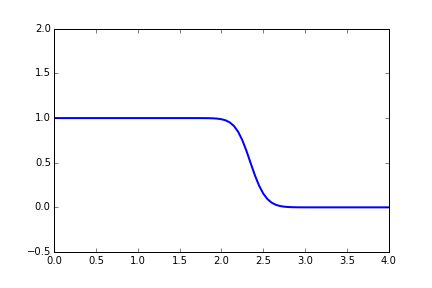
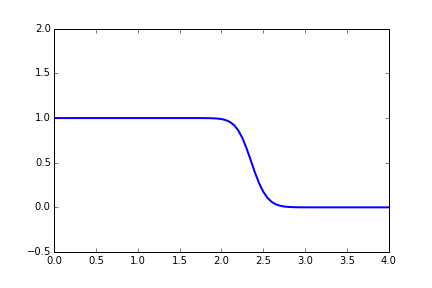
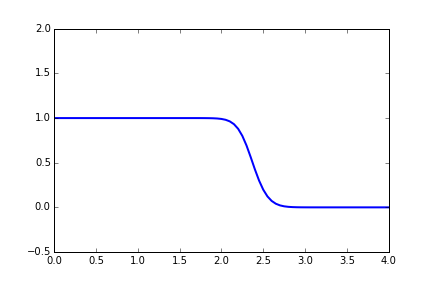
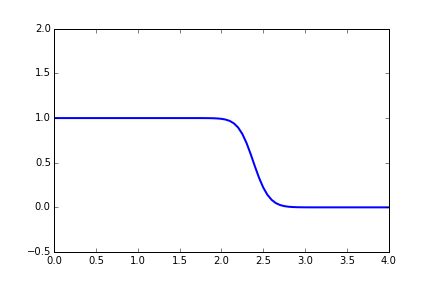
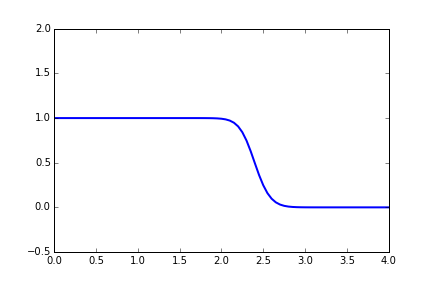
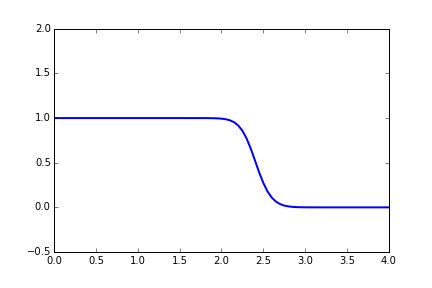
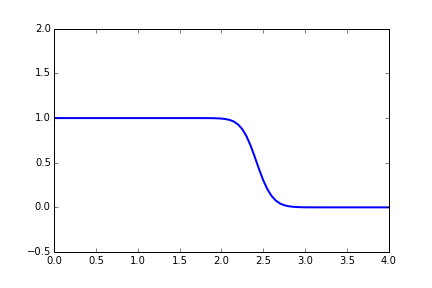
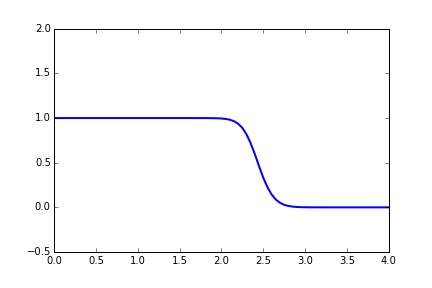
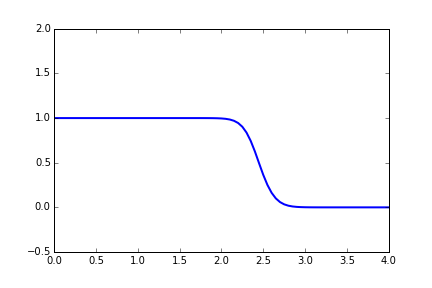
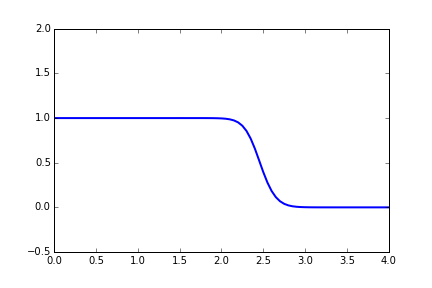
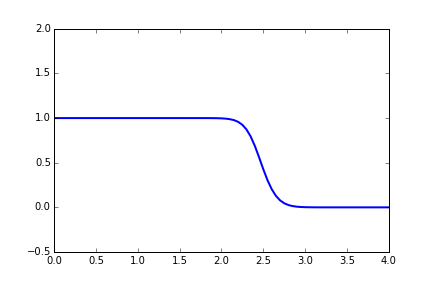
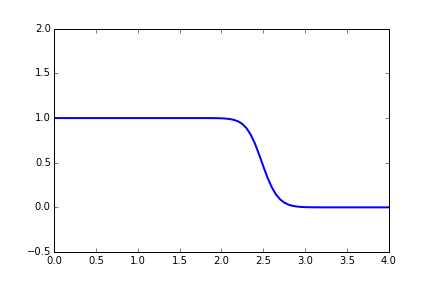
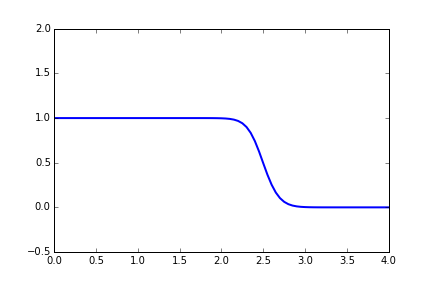
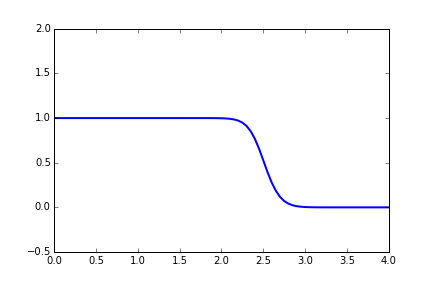
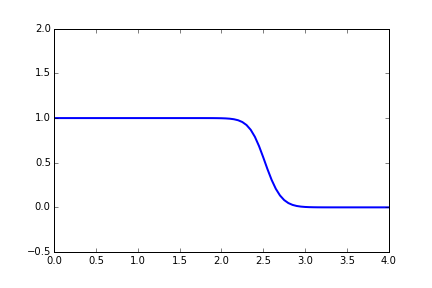
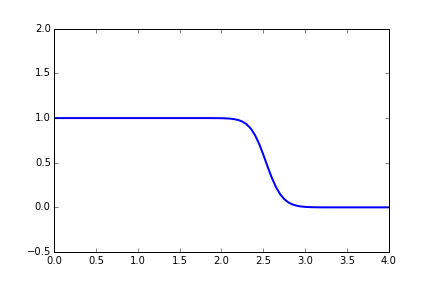
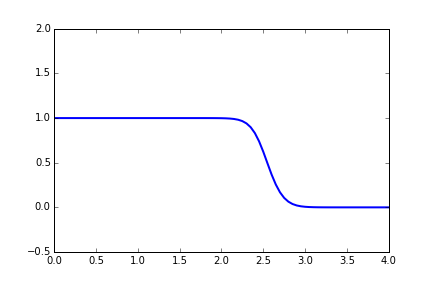
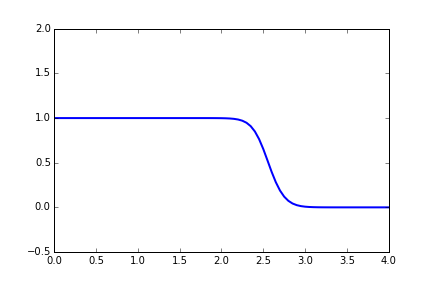
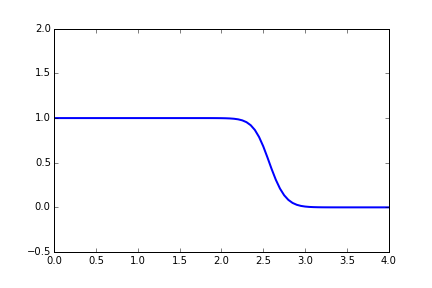
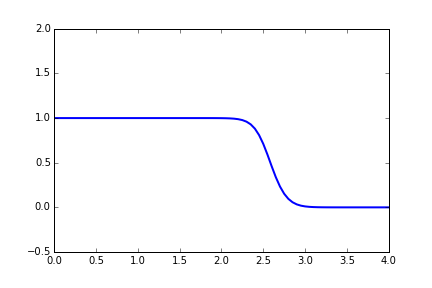
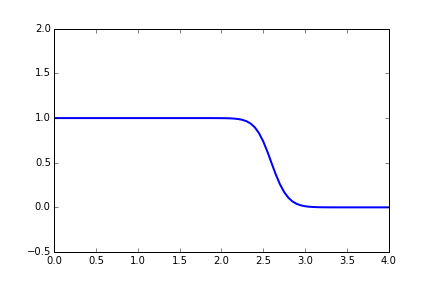
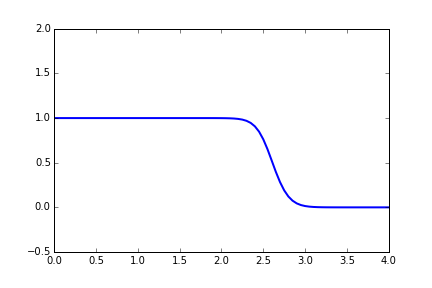
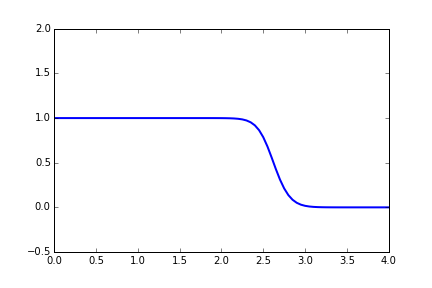
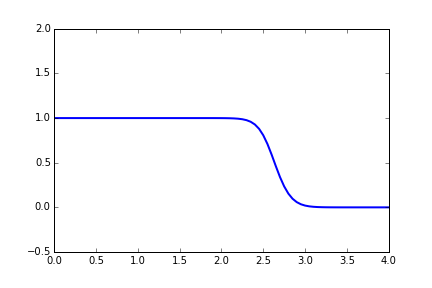
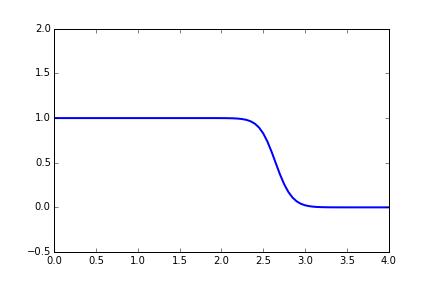
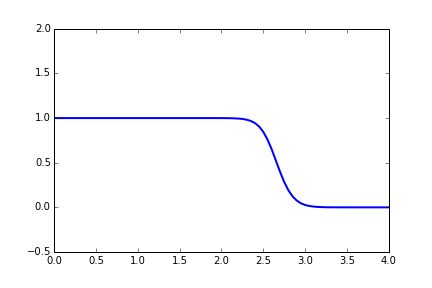
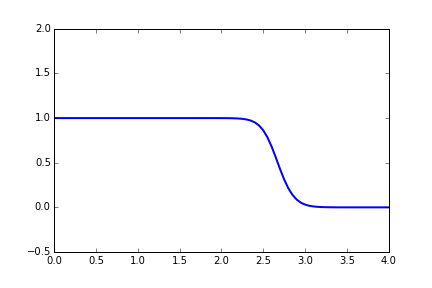
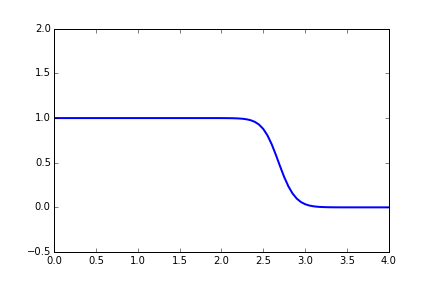
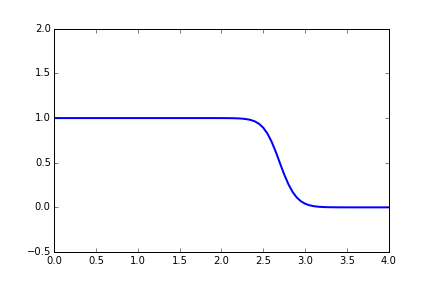
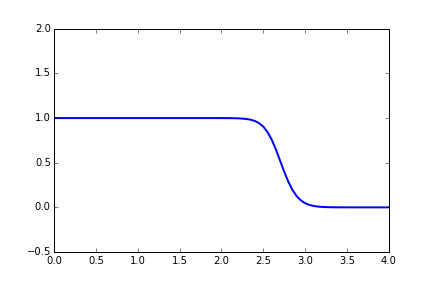
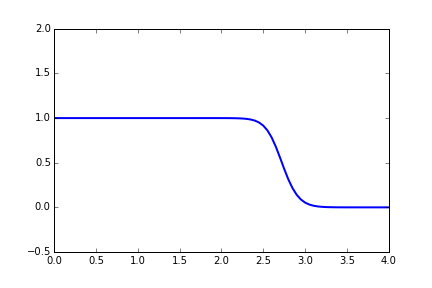
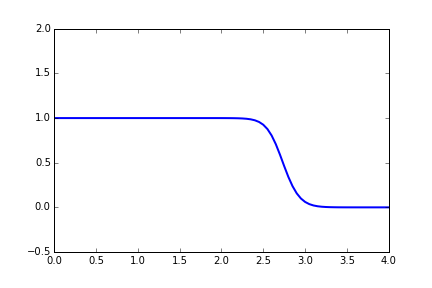
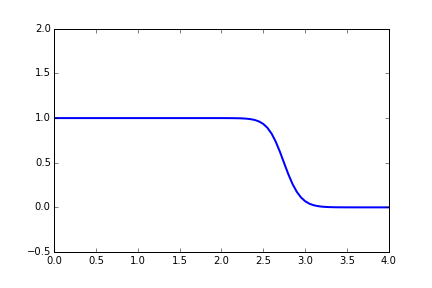
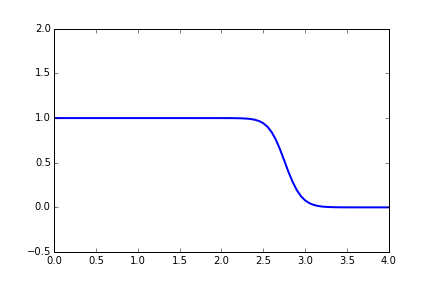
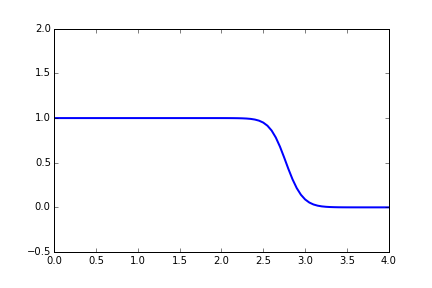
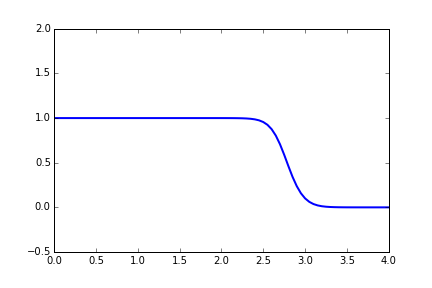
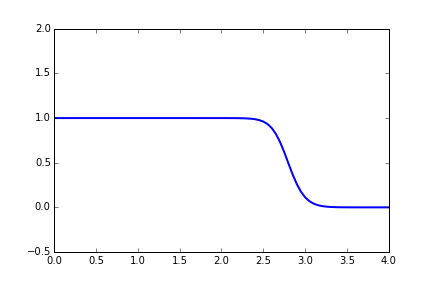
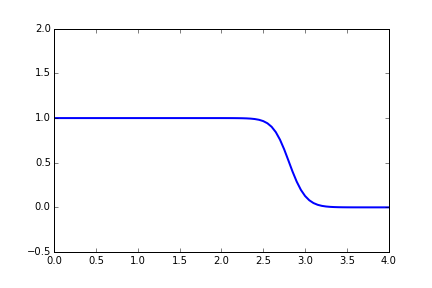
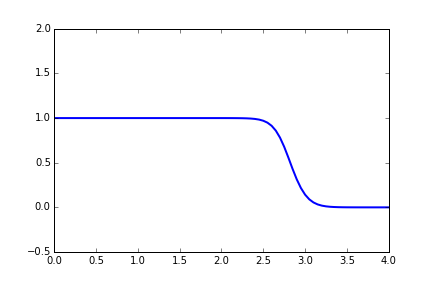
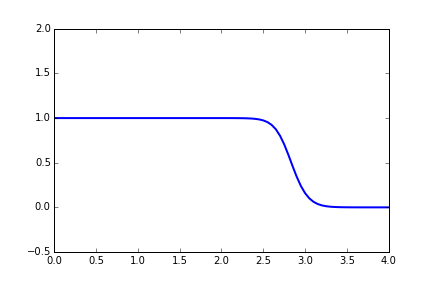

In [30]:
epsilon = 1
u = u_initial(nx)
sigma = 1
dt = sigma*dx

un_damp = maccormack_damp(u,nt,dt,dx,epsilon)

fig = pyplot.figure();
ax = pyplot.axes(xlim=(0,4),ylim=(-.5,2));
line, = ax.plot([],[],lw=2);

anim = animation.FuncAnimation(fig, animate, frames=un_damp, interval=50)
display_animation(anim, default_mode='once')